<a href="https://colab.research.google.com/github/Social-merit/Machine-learning-Deep-learning/blob/main/MachineLearningAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Install*** Packages

In [ ]:
!pip install apyori


### ***Import*** Packages

In [ ]:
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ***Dataset*** **Pipline**

### Importing dataset from Colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


!ls /content/drive/MyDrive/Program/MachineLearningAZCodesAndDatasets/Part2Regression/Section4SimpleLinearRegression/Python/ # see files in the directory

%cd /content/drive/MyDrive/Program/MachineLearningAZCodesAndDatasets/Part2Regression/Section4SimpleLinearRegression/Python/ # switch to this directory

### Fetch dataset from Github repo

In [ ]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv
     

### Upload file from your *system*

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv
User uploaded file "Market_Basket_Optimisation.csv" with length 302908 bytes


## Asignment of Dataset to a variable  

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')

⚓

⚓

## **Regression**

### Simple Linear Regression

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


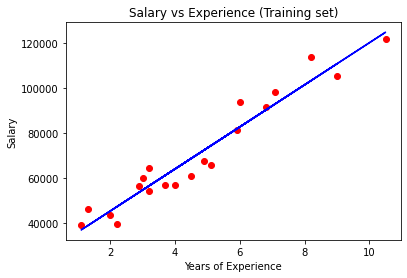

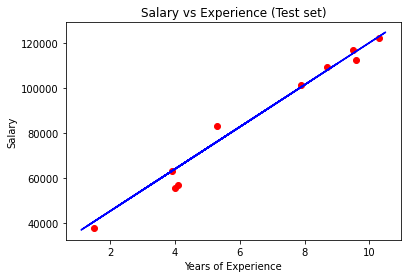

In [ ]:
#import ing packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Patitioning Dataset
SLRDataset = dataset

X = SLRDataset.iloc[:, :-1].values
y = SLRDataset.iloc[:, -1].values

## Spltting the datast into training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results
y_pred = regressor.predict(X_test)
#print(y_pred)

## Visualising the Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the training result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### ⚓ Optional dataset clearing

### Multiple Linear Regression

**Optional dataset clearing Start**

---



In [ ]:
MLRDataset = dataset
X = MLRDataset.iloc[:, :-1].values
y = MLRDataset.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

**END**

---



In [ ]:
# Other imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Multiple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

### Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Decision Tree Regression

In [ ]:
DTRDataset = dataset

X = DTRDataset.iloc[:, 1:-1].values
y = DTRDataset.iloc[:, -1].values

In [ ]:
## Other import package
from sklearn.tree import DecisionTreeRegressor

### Training the Decision Tree Regression model on the whole dataset
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

### Predicting a new result
regressor.predict([[6.5]])


### Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



### Random Forest Regression

In [ ]:
RFRDataset = dataset

X = RFRDataset.iloc[:, 1:-1].values
y = RFRDataset.iloc[:, -1].values

In [ ]:

### import packages
from sklearn.ensemble import RandomForestRegressor

### Training the Random Forest Regression model on the whole dataset
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

### Predicting a new result
regressor.predict([[6.5]])


### Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [ ]:
PRDataset = dataset

X = PRDataset.iloc[:, 1:-1].values
y = PRDataset.iloc[:, -1].values

In [ ]:
## Import packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Training the Linear Regression model on the whole dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)


### Training the Polynomial Regression model on the whole dataset
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

### Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


### Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


### Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with Linear Regression
lin_reg.predict([[6.5]])

### Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))





### Support Vector Regression (SVR)

In [ ]:
SVRDataset = dataset

X = PRDataset.iloc[:, 1:-1].values
y = PRDataset.iloc[:, -1].values




In [ ]:
## optional scaling factor
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


print(X)
print(y)

In [ ]:
## import package
from sklearn.svm import SVR


### Training the SVR model on the whole dataset
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

### Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

### Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


### Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()





---



---



## **Classification**

### Logistic Regression

In [ ]:
LRCMDataset = dataset

X = LRCMDataset.iloc[:, 1:-1].values
y = LRCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
##  Feature Scaling
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


### Predicting a new result (with a rough number)
print(classifier.predict(sc.transform([[30,87000]])))

### Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()








### K-Nearest Neighbors (K-NN)

In [ ]:


#dataset
KNNCMDataset = dataset

X = KNNCMDataset.iloc[:, 1:-1].values
y = KNNCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
### import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the K-NN model on the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))


### Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Support Vector Machine (SVM)

In [ ]:
#dataset
KNNCMDataset = dataset

X = KNNCMDataset.iloc[:, 1:-1].values
y = KNNCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## import packages
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the SVM model on the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

### Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



### Kernel SVM

In [ ]:
KSVMCMDataset = dataset

X = KSVMCMDataset.iloc[:, 1:-1].values
y = KSVMCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## importing packages
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the Kernel SVM model on the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

### Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()




### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Naive Bayes

In [ ]:
NBCMDataset = dataset

X = NBCMDataset.iloc[:, 1:-1].values
y = NBCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## Importing packages
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

### Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Decision Tree Classification

In [ ]:
DTCMDataset = dataset

X = DTCMDataset.iloc[:, 1:-1].values
y = DTCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the Decision Tree Classification model on the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))


### Predicting the Test set result
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



### Random Forest Classification

In [ ]:
RFCMDataset = dataset

X = RFCMDataset.iloc[:, 1:-1].values
y = RFCMDataset.iloc[:, -1].values
print(X)
print(y)

### Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
### Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print(X_train)
print(X_test)

In [ ]:
## importing packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Training the Random Forest Classification model on the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

### Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))


### Predicting Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


##  **Clustering**

### K-Means Clustering

In [ ]:
## importing packages
from sklearn.cluster import KMeans

#dataset
KMCCDataset = dataset
X = KMCCDataset.iloc[:, [3, 4]].values


### Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




### Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()




### Hierarchical Clustering

In [ ]:
## importing packages
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#dataset
HCCDataset = dataset
X = HCCDataset.iloc[:, [3, 4]].values


### Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


### Training the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


### Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


## **Association** Rule 

### Apriori

In [ ]:

### Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])


### Training the Apriori model on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)


### Displaying the first results coming directly from the output of the apriori function
print(".................. Results from the apriori function ..........................")
results = list(rules)
print(results)

### Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])



### Displaying the results non sorted
print("............. Displaying the results non sorted ........................")
print(resultsinDataFrame)

### Displaying the results sorted by descending lifts
print("............. Displaying the results sorted by descending lifts ........................")
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')


.................. Results from the apriori function ..........................
[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_ba

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


### Eclat

In [ ]:
# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Training the Eclat model on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

# Visualising the results

## Displaying the first results coming directly from the output of the apriori function
print(".................. Results from the Eclat function ..........................")
results = list(rules)
print(results)

## Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])


### Displaying the results non sorted
print("............. Displaying the results non sorted ........................")
print(resultsinDataFrame)

### Displaying the results sorted by descending lifts
print("............. Displaying the results sorted by descending lifts ........................")
resultsinDataFrame.nlargest(n = 10, columns = 'Support')



.................. Results from the Eclat function ..........................
[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
